<a href="https://colab.research.google.com/github/Ankita-chouhan-github/Sentiment-Analysis-of-COVID-19-tweets/blob/main/COVID_19_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Description : Sentiment Analysis - Predicting Sentiment of COVID-19 Tweets**
This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.
The names and usernames have been given codes to avoid any privacy concerns.
You are given the following information:
* Location
* Tweet At
* Original Tweet
* Label

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification Capstone Project/Coronavirus Tweets.csv', encoding = 'latin-1')

In [4]:
df1 = df.copy()

We have made a copy so that the original dataframe remains same while we perform transformation on the copied dataframe.

In [5]:
df1.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


There are no Null values present in our dataset

In [7]:
df1.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

There are 6 columns out of which our target/dependent variable is sentiment

In [8]:
# for sentiment analysis the two main columns that we require are 'OriginalTweet', 'Sentiment', 'Location' & 'TweetAt'
df_model = df1[['OriginalTweet','Sentiment', 'Location', 'TweetAt']]

In [10]:
df_model.head()

,OriginalTweet,Sentiment,Location,TweetAt
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,London,16-03-2020
1,advice Talk to your neighbours family to excha...,Positive,UK,16-03-2020
2,Coronavirus Australia: Woolworths to give elde...,Positive,Vagabonds,16-03-2020
3,My food stock is not the only one which is emp...,Positive,NaN,16-03-2020
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,NaN,16-03-2020


In [ ]:
# Statistical Analysis of datset
df_model.describe()

,OriginalTweet,Sentiment,Location,TweetAt
count,41157,41157,32567,41157
unique,41157,5,12220,30
top,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive,London,20-03-2020
freq,1,11422,540,3448


In [11]:
# Checking unique values in our dataset
df_model.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [12]:
#check duplicate entries
len(df_model[df_model.duplicated()])

0

There are no duplicate entries in our dataset

In [13]:
# Checking null value
df_model.isnull().sum()

OriginalTweet       0
Sentiment           0
Location         8590
TweetAt             0
dtype: int64

In [14]:
# Checking  missing values in 'Location' column
miss_value = df_model['Location'].isnull().sum()/(df_model.shape[0]) * 100
print("We have {:.2f} % of missing values in 'Location' Column".format(miss_value))


We have 20.87 % of missing values in 'Location' Column


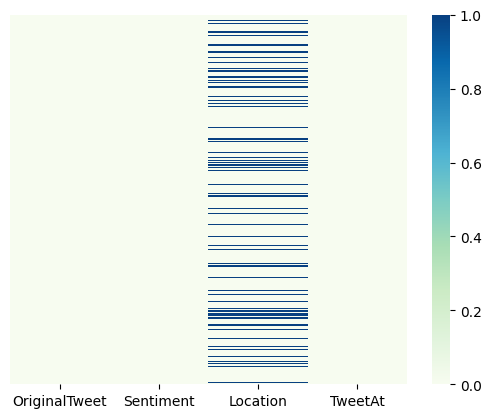

In [15]:
# Plot for missing values across different columns
missing_graph = sns.heatmap(df_model.isnull(), cbar=True, yticklabels=False, cmap="GnBu")
plt.show()

#**EDA- Exploratory Data Analysis**

**Short Overview:** The original dataset has 6 columns and 41157 rows. In order to analyse various sentiments, We require just only two columns named Original Tweet and Sentiment. There are five types of sentiments- Extremely Negative, Negative, Neutral, Positive and Extremely Positive.The columns such as “UserName” and “ScreenName” does not give any meaningful insights for our analysis. All tweets data collected from the months of March and April 2020. There are various #hashtags in tweets column which we will like to explore.People also have different sentiments about various issues shows us their optimism during pandemic times.

#**1. Location**

In [ ]:
# Looking the count value of different Location
df_model.Location.value_counts().head(20)

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
Canada                     191
England, United Kingdom    191
Toronto, Ontario           160
Global                     159
Chicago, IL                155
California, USA            153
San Francisco, CA          152
Boston, MA                 150
New York, USA              140
Name: Location, dtype: int64

In [ ]:
# Looking for the unique values in the variable
df_model.Location.unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

In [16]:
# Describing the Location
df_model.Location.describe()

count      32567
unique     12220
top       London
freq         540
Name: Location, dtype: object

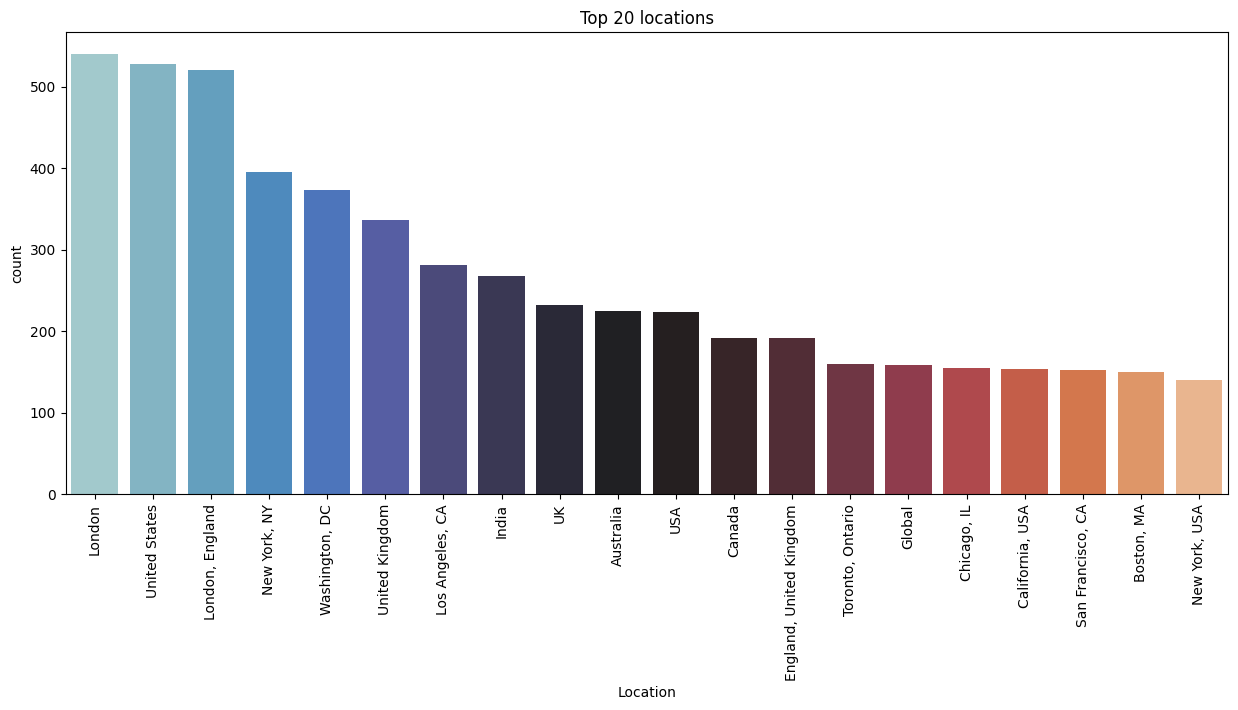

In [27]:
# Looking for top 15 Countries in Countplot
plt.figure(figsize=(15,6))
sns.countplot(x=df_model.Location, order = df_model.Location.value_counts().iloc[:20].index, palette ='icefire')
plt.title('Top 20 locations')
plt.xticks(rotation=90, size=10)
plt.show()



1.   The above count plot shows the top 15 locations in the dataset.
2. Plot shows the London to be the maximum among all the different locations.
3. Second place is of United States and India ranks at 8th place.




In [28]:
# Creating dataframe for location
location = pd.DataFrame(df_model['Location'].value_counts().sort_values(ascending=False))
location = location.rename(columns={'Location':'count'})

In [29]:
# Importing required library
import plotly.graph_objects as go

In [44]:
# Plotting the interactive pie plot in percentage of Top 20 locations
data = {
   "values": location['count'][:20],
   "labels": location.index[:20],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(title="<b>Percentage of Location</b>", legend=dict(x=0.1, y=1.0, orientation="v"))
data = [data]
fig = go.Figure(data = data, layout = layout)
fig.update_layout(title_x=0.5)
fig.show()



1.   The above pie plot shows the percentage wise Top 15 locations in the present dataset.
2. Here we can again see London has the maximum percentage share of 10.1%, followed by United States with 9.83% and again London, England with 9.68%.
3. India which is placed at 8th place shares the percentage of 4.99%.




#**2. Tweet Date**

In [36]:
# Count value of TweetAt (Tweeting date)
df_model['TweetAt'].value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

In [37]:
# Checking unique Tweet dates in TweetAt
df_model.TweetAt.unique()

array(['16-03-2020', '17-03-2020', '18-03-2020', '19-03-2020',
       '20-03-2020', '21-03-2020', '22-03-2020', '23-03-2020',
       '24-03-2020', '25-03-2020', '26-03-2020', '27-03-2020',
       '28-03-2020', '29-03-2020', '30-03-2020', '31-03-2020',
       '01-04-2020', '02-04-2020', '03-04-2020', '04-04-2020',
       '05-04-2020', '06-04-2020', '07-04-2020', '08-04-2020',
       '09-04-2020', '10-04-2020', '11-04-2020', '12-04-2020',
       '13-04-2020', '14-04-2020'], dtype=object)

In [38]:
# Describing TweetAt
df_model.TweetAt.describe()

count          41157
unique            30
top       20-03-2020
freq            3448
Name: TweetAt, dtype: object

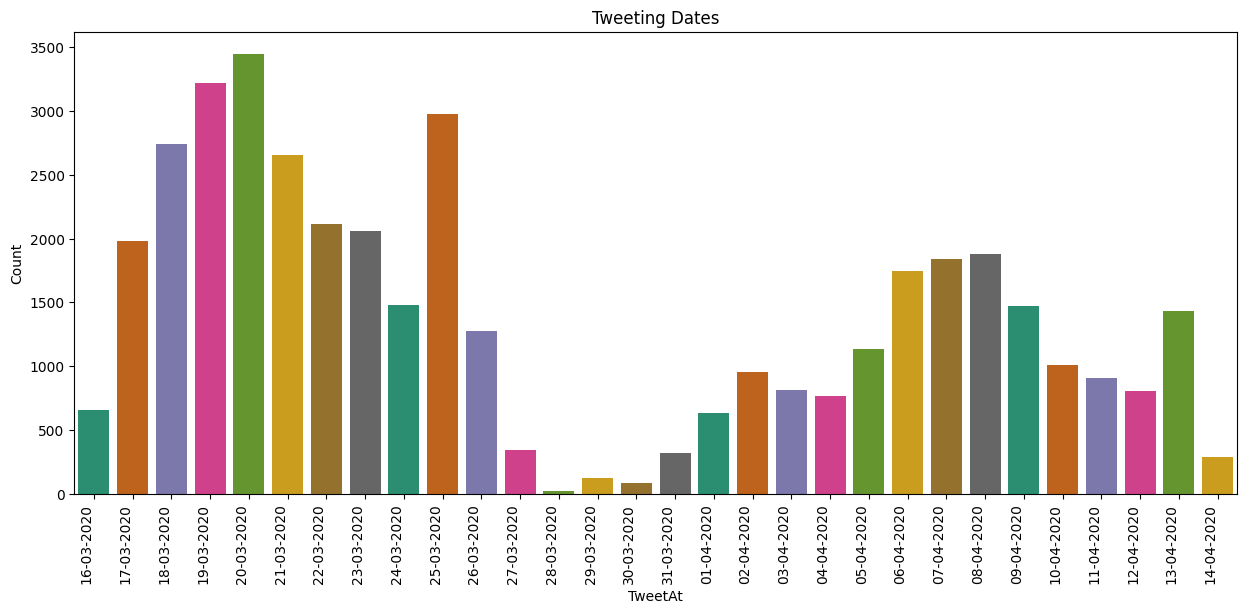

In [42]:
# Distribution of Dates of Tweets
plt.figure(figsize=(15,6))
sns.countplot(x='TweetAt', data=df_model, palette ='Dark2')
plt.xticks(rotation=90, ha='right')
plt.title("Tweeting Dates")
plt.ylabel("Count", fontsize = 10)
plt.xlabel("TweetAt",fontsize = 10)
plt.show()

1. The above count plot shows the overall distribution of different tweeting dates in the dataset. Starting from the mid-month of March 2020 to mid-month of April 2020.
2. From the we can find out that the date 20-03-2020 has the maximum count value among all the other occuring dates.
3. Least count value is for date 28-03-2020.
4. The tweeting date ranges from 16-03-2020 to 14-04-2020, which is approx 30 days in total.

#**3. Sentiment**

In [45]:
# Checking unique values in Sentiment
df_model.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [46]:
# Describing the sentiments
df_model.Sentiment.describe()

count        41157
unique           5
top       Positive
freq         11422
Name: Sentiment, dtype: object

In [47]:
# Checking sentiment count value
df_model.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

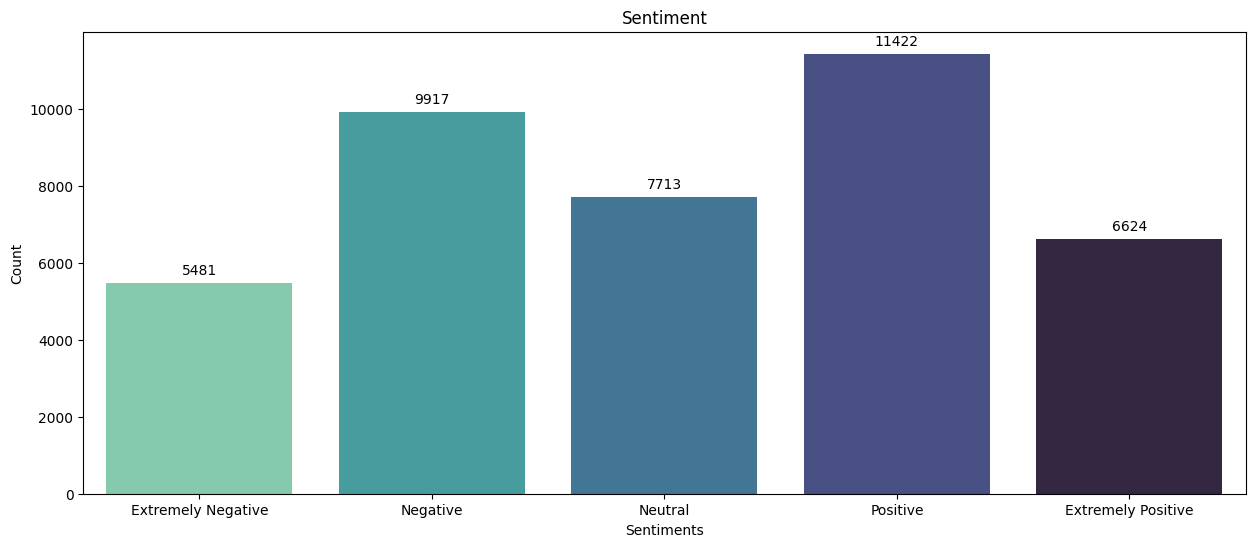

In [49]:
# Plotting the Sentiments count value as countplot
plt.figure(figsize=(15,6))
splot = sns.countplot(x='Sentiment', data=df_model, order=['Extremely Negative', 'Negative', 'Neutral', 'Positive', 'Extremely Positive'], palette="mako_r")
# adding annotation
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0,9), textcoords = 'offset points')
plt.title("Sentiment")
plt.ylabel("Count", fontsize = 10)
plt.xlabel("Sentiments",fontsize = 10)
plt.show()



1.   The above plot is showing the count value of different sentiments present in the dataset.
2. The most common occuring sentiment is positive, followed by negative, neutral, extremely positive and least is extremely negative.




#**Class Distribution of Each Sentiment Type**

In [52]:
# Copying the dataframe
tt_df = df_model.copy()

In [53]:
# Creating the new column 'Text'
tt_df['text'] = tt_df.OriginalTweet
tt_df["text"] = tt_df["text"].astype(str)

In [54]:
# Calculating the text count
class_df = tt_df.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
class_df.style.background_gradient(cmap='viridis')

,Sentiment,text
4,Positive,11422
2,Negative,9917
3,Neutral,7713
1,Extremely Positive,6624
0,Extremely Negative,5481


#**Number of characters of each sentiments types**

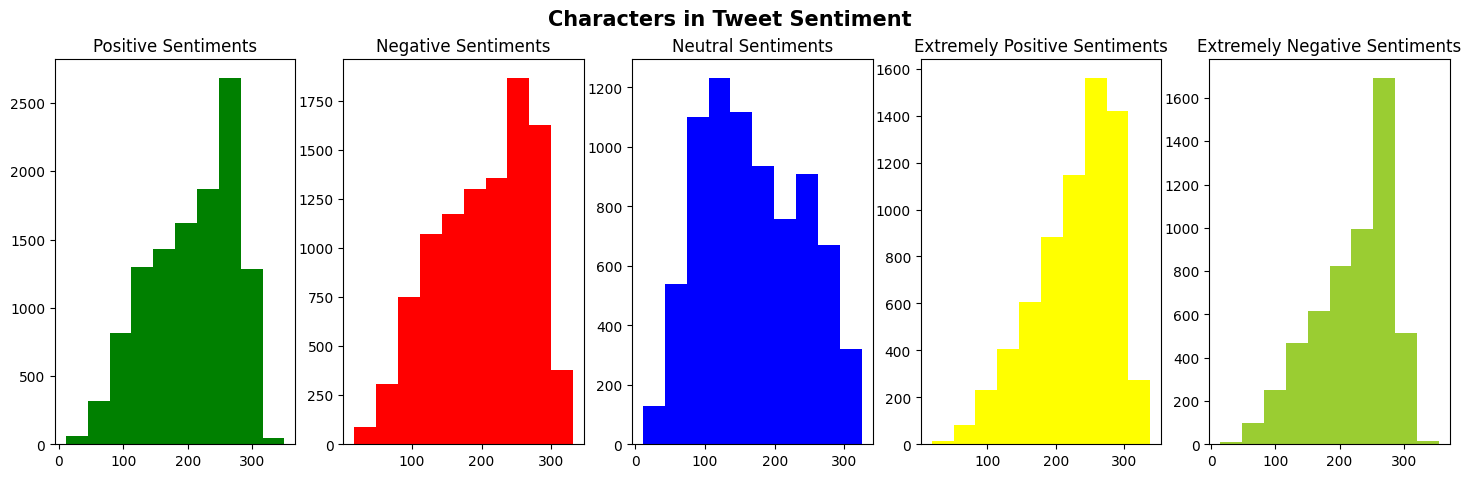

In [59]:
# Plotting the number of characters for each tweet sentiment types
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(18,5))
tweet_len=tt_df[tt_df['Sentiment']=="Positive"]['text'].str.len()
ax1.hist(tweet_len,color='green')
ax1.set_title('Positive Sentiments')

tweet_len=tt_df[tt_df['Sentiment']=="Negative"]['text'].str.len()
ax2.hist(tweet_len,color='red')
ax2.set_title('Negative Sentiments')

tweet_len=tt_df[tt_df['Sentiment']=="Neutral"]['text'].str.len()
ax3.hist(tweet_len,color='blue')
ax3.set_title('Neutral Sentiments')

tweet_len=tt_df[tt_df['Sentiment']=="Extremely Positive"]['text'].str.len()
ax4.hist(tweet_len,color='yellow')
ax4.set_title('Extremely Positive Sentiments')

tweet_len=tt_df[tt_df['Sentiment']=="Extremely Negative"]['text'].str.len()
ax5.hist(tweet_len,color='yellowgreen')
ax5.set_title('Extremely Negative Sentiments')


fig.suptitle("Characters in Tweet Sentiment", size=15,fontweight="bold")
# Showing the plot
plt.show()

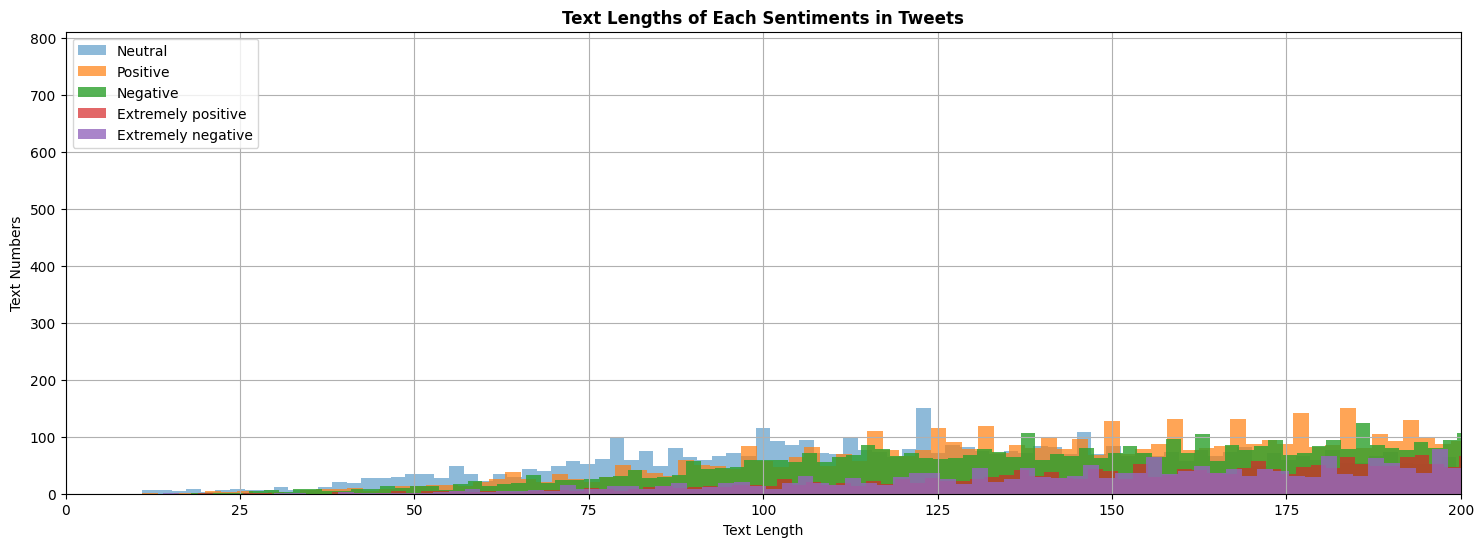

In [60]:
# Importing required library
from matplotlib.pylab import tile

# Writing the function
def length(text):
    '''a function which returns the length of text'''
    return len(text)
tt_df['length'] = tt_df['text'].apply(length)

plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(tt_df[tt_df['Sentiment'] == "Neutral"]['length'], alpha = 0.5, bins=bins, label='Neutral')
plt.hist(tt_df[tt_df['Sentiment'] == "Positive"]['length'], alpha = 0.7, bins=bins, label='Positive')
plt.hist(tt_df[tt_df['Sentiment'] == "Negative"]['length'], alpha = 0.8, bins=bins, label='Negative')
plt.hist(tt_df[tt_df['Sentiment'] == "Extremely Positive"]['length'], alpha = 0.7, bins=bins, label='Extremely positive')
plt.hist(tt_df[tt_df['Sentiment'] == "Extremely Negative"]['length'], alpha = 0.8, bins=bins, label='Extremely negative')


# Plotting the data
plt.title('Text Lengths of Each Sentiments in Tweets', fontweight='bold')
plt.xlabel('Text Length')
plt.ylabel('Text Numbers')
plt.legend(loc='upper left')
plt.xlim(0,200)
plt.grid()
plt.show()

#**Average word length in a tweet**

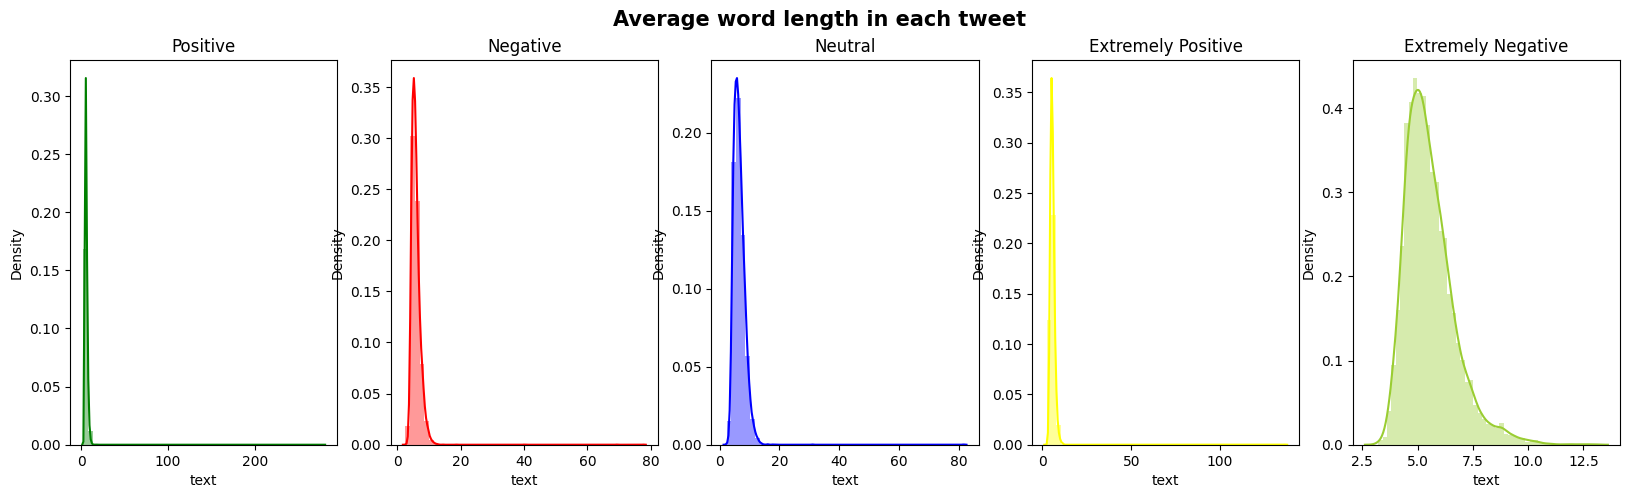

In [62]:
# Finding the average word length in each tweet sentiment type.
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(20,5))
word= tt_df[tt_df['Sentiment']=="Positive"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='green')
ax1.set_title('Positive')

word= tt_df[tt_df['Sentiment']=="Negative"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Negative')

word= tt_df[tt_df['Sentiment']=="Neutral"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='blue')
ax3.set_title('Neutral')

word= tt_df[tt_df['Sentiment']=="Extremely Positive"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax4,color='yellow')
ax4.set_title('Extremely Positive')

word= tt_df[tt_df['Sentiment']=="Extremely Negative"]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax5,color='yellowgreen')
ax5.set_title('Extremely Negative')

# Showing the Plot

fig.suptitle('Average word length in each tweet', size=15,fontweight="bold")
plt.show()